#                                      Data-set-2 : CreditData 


### General guidelines
1. Exploratory data analysis
2. Data Pre-Processing and feature engineering
➢ The test train split should be the first step
➢ Ensure that Pre-Processing is done independently on train and test data.
➢ Imputation, Standardization
4. Different kinds of model building
➢ Hyper-parameter tuning
➢ Cross Validation
5. Choice of evaluation metric and justification.
6. Comparison of different model performances and justification
7. Visualizations wherever appropriate
8. Coding practices and comments

##### NOTE: Target Variable = A16
#### Assuming: A16=1 as "Class-1" and A16=0 as "Class-0"

In [2]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
# Load the Credit data-set
creditData = pd.read_csv('CreditData.csv')

### Data Exploration

In [4]:
# Summary of data-set
creditData.describe()

,A3,A8,A11,A15,A16
count,690.000000,690.000000,690.00000,690.000000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507,0.444928
std,4.978163,3.346513,4.86294,5210.102598,0.497318
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.165000,0.00000,0.000000,0.000000
50%,2.750000,1.000000,0.00000,5.000000,0.000000
75%,7.207500,2.625000,3.00000,395.500000,1.000000
max,28.000000,28.500000,67.00000,100000.000000,1.000000


In [5]:
# Check the dimesion of the data-set
creditData.shape

(690, 16)

In [6]:
# Names of the attributes
creditData.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16'],
      dtype='object')

In [7]:
# Top 5 records
creditData.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [8]:
# Bottom 5 records
creditData.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,0
689,b,35,3.375,u,g,c,h,8.29,f,f,0,t,g,0,0,0


In [9]:
# Data-type of all attributes
creditData.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16      int64
dtype: object

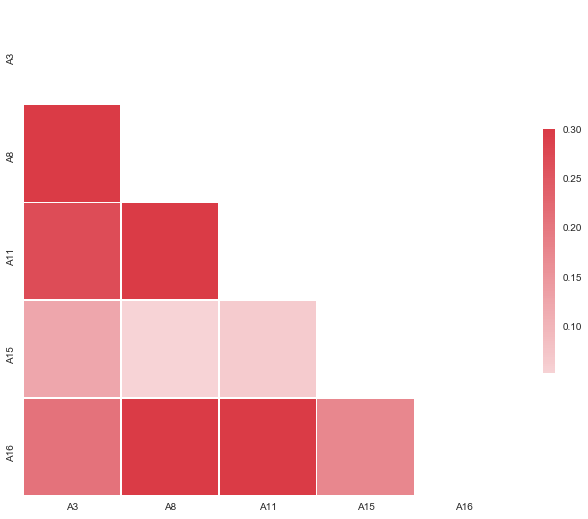

In [10]:
# Correlation Plot
sns.set(style="white")

corr = creditData.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
# Observations from data-set

# Categorical attributes = A1, A4, A5, A6, A7, A9, A10, A12, A13, A16
# Numeric attributes = A2, A3, A8, A11, A14, A15

# Convert Category to Numeric for : A2, A14
creditData['A2'] = pd.to_numeric(creditData['A2'], errors='coerce')
creditData['A14'] = pd.to_numeric(creditData['A14'], errors='coerce')

# Convert Numeric to Category for : A16
creditData['A16'] = creditData['A16'].astype('category')

In [12]:
# Data-type of all attributes after conversion
creditData.dtypes

A1       object
A2      float64
A3      float64
A4       object
A5       object
A6       object
A7       object
A8      float64
A9       object
A10      object
A11       int64
A12      object
A13      object
A14     float64
A15       int64
A16    category
dtype: object

In [13]:
# Data distribution in target attribute "A16"
creditData['A16'].value_counts()

0    383
1    307
Name: A16, dtype: int64

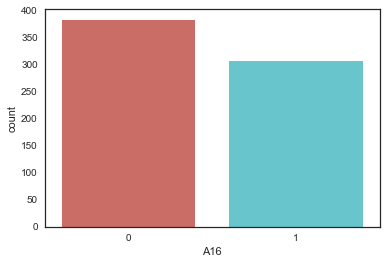

In [14]:
# Plot the graph to show distribution in target attribute "A16"
sns.countplot(x='A16', data=creditData, palette='hls')

## Data Pre-processing

In [15]:
# Convert all "object" data-type to "category"
cat_attributes = creditData.dtypes[creditData.dtypes == 'object'].index
print(cat_attributes)

creditData[cat_attributes] = creditData[cat_attributes].apply(lambda x: x.astype('category'))

# Print data-types
creditData.dtypes

Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], dtype='object')


A1     category
A2      float64
A3      float64
A4     category
A5     category
A6     category
A7     category
A8      float64
A9     category
A10    category
A11       int64
A12    category
A13    category
A14     float64
A15       int64
A16    category
dtype: object

### A) Split the data in Train and Test data-set

In [17]:
# Independent attributes
attributes_x = creditData.iloc[:,:15]
print(attributes_x.head())

  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0


In [18]:
# Target attribute
target_y = creditData.iloc[:,15]
print(target_y.head())

0    1
1    1
2    1
3    1
4    1
Name: A16, dtype: category
Categories (2, int64): [0, 1]


In [19]:
# Split the data in TRAIN and TEST data-set
x_train, x_test, y_train, y_test = train_test_split(attributes_x, target_y, test_size = 0.3, random_state = 4)

In [20]:
# Dimension of Train and Test data-sets
print(x_train.shape)
print(y_train.shape)

print('----------------')

print(x_test.shape)
print(y_test.shape)

(483, 15)
(483,)
----------------
(207, 15)
(207,)


### B) Separate NUMERIC and CATEGORICAL attributes from TRAIN and TEST data-set

In [21]:
#--------------- TRAIN DATA-SET ---------------#

# Get the index of Categorical and Numeric data-set columns

# Categorical data
cat_attr = x_train.dtypes[x_train.dtypes=='category'].index
print(cat_attr)

# Numeric data
num_attr = x_train.columns.difference(cat_attr)
print(num_attr)

Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], dtype='object')
Index(['A11', 'A14', 'A15', 'A2', 'A3', 'A8'], dtype='object')


In [22]:
### Separate Categorical and Numeric attributes

# Categorical data
x_train_cat = pd.DataFrame(x_train[cat_attr])
print(x_train_cat.head())

print("---------------------------------------------")

# Numeric data
x_train_num = x_train[num_attr]
print(x_train_num.head())

    A1 A4 A5 A6 A7 A9 A10 A12 A13
112  b  u  g  w  v  t   f   t   g
301  b  u  g  d  v  f   f   t   s
356  b  u  g  d  v  f   f   f   g
18   b  u  g  d  h  t   f   t   g
6    b  u  g  r  h  t   f   t   g
---------------------------------------------
     A11    A14    A15     A2      A3     A8
112    0  260.0      0  24.58  12.500  0.875
301    0  280.0      0  18.25   0.165  0.250
356    0  168.0      0  41.17   1.335  0.165
18     0    0.0      0  21.83   0.250  0.665
6      0  164.0  31285  33.17   1.040  6.500


In [23]:
# Verify the data-types of Categorical and Numeric attributes
print(x_train_cat.dtypes)

print("--------------------")

print(x_train_num.dtypes)

A1     category
A4     category
A5     category
A6     category
A7     category
A9     category
A10    category
A12    category
A13    category
dtype: object
--------------------
A11      int64
A14    float64
A15      int64
A2     float64
A3     float64
A8     float64
dtype: object


In [24]:
#--------------- TEST DATA-SET ---------------#

# Get the index of Categorical and Numeric data-set columns

# Categorical data
cat_attr = x_test.dtypes[x_test.dtypes == 'category'].index
print(cat_attr)

# Numeric data
num_attr = x_test.columns.difference(cat_attr)
print(num_attr)

Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], dtype='object')
Index(['A11', 'A14', 'A15', 'A2', 'A3', 'A8'], dtype='object')


In [25]:
# Separate Categorical and Numeric data

# Categorical data
x_test_cat = pd.DataFrame(x_test[cat_attr])
print(x_test_cat.head())

print("---------------------------------------------")

# Numeric data
x_test_num = x_test[num_attr]
print(x_test_num.head())

    A1 A4 A5  A6 A7 A9 A10 A12 A13
184  a  u  g   q  v  t   t   f   g
90   b  y  p   c  h  t   f   f   g
170  a  y  p  aa  v  t   f   t   g
477  b  y  p   i  h  f   f   t   s
265  b  y  p   c  v  f   f   f   g
---------------------------------------------
     A11    A14   A15     A2      A3      A8
184    7  129.0  3257  22.42   5.665   2.585
90     0  112.0     0  62.50  12.750   5.000
170    0  370.0     0  25.08   2.540   0.250
477    0  200.0     0  39.17   2.500  10.000
265    0  140.0   722  17.08   0.085   0.040


In [26]:
# Verify the data-types of Categorical and Numeric attributes
print(x_test_cat.dtypes)

print("--------------------")

print(x_test_num.dtypes)

A1     category
A4     category
A5     category
A6     category
A7     category
A9     category
A10    category
A12    category
A13    category
dtype: object
--------------------
A11      int64
A14    float64
A15      int64
A2     float64
A3     float64
A8     float64
dtype: object


### C) Handling Missing values in TRAIN and TEST data-sets

#### >>> 1) Imputation for NUMERIC data in both TRAIN and TEST data-set

#### >>> 2) Imputation for CATEGORICAL attributes in both Train and Test data-set
Note - The missing values are categorical in nature. Hence the standard way of using Imputer is not possible. SO USING "MODE"

### D) Standardize the Train and Test Numeric data-sets

In [40]:
# Standardize TRAIN data-set
print(x_train_num.describe())

print("-------------------------------------------------------------------")

scaler = StandardScaler()
x_train_num_std = pd.DataFrame(scaler.fit_transform(x_train_num), columns=x_train_num.columns)

print(x_train_num_std.describe())

              A11          A14            A15          A2          A3  \
count  483.000000   483.000000     483.000000  483.000000  483.000000   
mean     2.544513   184.812632    1069.144928   31.194292    4.768551   
std      5.279293   178.760696    5639.945077   11.572425    5.070703   
min      0.000000     0.000000       0.000000   13.750000    0.000000   
25%      0.000000    80.000000       0.000000   22.500000    1.000000   
50%      0.000000   160.000000       6.000000   28.330000    2.750000   
75%      3.000000   260.000000     487.500000   37.330000    7.520000   
max     67.000000  2000.000000  100000.000000   74.830000   28.000000   

               A8  
count  483.000000  
mean     2.265735  
std      3.428249  
min      0.000000  
25%      0.165000  
50%      1.000000  
75%      2.667500  
max     28.500000  
-------------------------------------------------------------------
                A11           A14           A15            A2            A3  \
count  4.830000

In [41]:
# Standardize TEST data-set
print(x_test_num.describe())

print("-------------------------------------------------------------------")

scaler = StandardScaler()
x_test_num_std = pd.DataFrame(scaler.fit_transform(x_test_num), columns=x_test_num.columns)

print(x_test_num_std.describe())

              A11         A14           A15          A2          A3  \
count  207.000000  207.000000    207.000000  207.000000  207.000000   
mean     2.062802  182.138614    896.613527   32.430829    4.735797   
std      3.703962  156.068726   4042.720690   12.470538    4.767161   
min      0.000000    0.000000      0.000000   15.170000    0.000000   
25%      0.000000   61.000000      0.000000   23.080000    1.145000   
50%      0.000000  160.000000      2.000000   29.670000    2.750000   
75%      2.000000  280.000000    327.000000   38.625000    7.000000   
max     20.000000  980.000000  50000.000000   80.250000   25.210000   

               A8  
count  207.000000  
mean     2.124638  
std      3.153389  
min      0.000000  
25%      0.165000  
50%      1.000000  
75%      2.605000  
max     18.000000  
-------------------------------------------------------------------
                A11           A14           A15            A2            A3  \
count  2.070000e+02  2.070000e+02

### E) PCA on Train and Test Numeric data-sets

### Dummy attributes - Converting TRAIN data-set Categorical attributes

In [42]:
#------------------ TRAIN DATA-SET -----------------------#

# Categorical Attributes : A1, A4, A5, A6, A7, A9, A10, A12, A13
x_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
112,b,24.58,12.500,u,g,w,v,0.875,t,f,0,t,g,260.0,0
301,b,18.25,0.165,u,g,d,v,0.250,f,f,0,t,s,280.0,0
356,b,41.17,1.335,u,g,d,v,0.165,f,f,0,f,g,168.0,0
18,b,21.83,0.250,u,g,d,h,0.665,t,f,0,t,g,0.0,0
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285


In [43]:
# x_train >>> Categorical Attributes : Convert them into Dummy attributes

# Categorical Attributes = A1, A4, A5, A6, A7, A9, A10, A12, A13

A1_Dummy = pd.get_dummies(x_train['A1'], drop_first=True)
A4_Dummy = pd.get_dummies(x_train['A4'], drop_first=True)
A5_Dummy = pd.get_dummies(x_train['A5'], drop_first=True)
A6_Dummy = pd.get_dummies(x_train['A6'], drop_first=True)
A7_Dummy = pd.get_dummies(x_train['A7'], drop_first=True)
A9_Dummy = pd.get_dummies(x_train['A9'], drop_first=True)
A10_Dummy = pd.get_dummies(x_train['A10'], drop_first=True)
A12_Dummy = pd.get_dummies(x_train['A12'], drop_first=True)
A13_Dummy = pd.get_dummies(x_train['A13'], drop_first=True)

In [44]:
# Concatnate dummy attributes with Train data-set
x_train_dummy = pd.concat([x_train, A1_Dummy, A4_Dummy, A5_Dummy, A6_Dummy, A7_Dummy, A9_Dummy, A10_Dummy, A12_Dummy, A13_Dummy], axis=1)
x_train_dummy.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,j,n,o,v,z,t,t,t,p,s
112,b,24.58,12.500,u,g,w,v,0.875,t,f,...,0,0,0,1,0,1,0,1,0,0
301,b,18.25,0.165,u,g,d,v,0.250,f,f,...,0,0,0,1,0,0,0,1,0,1
356,b,41.17,1.335,u,g,d,v,0.165,f,f,...,0,0,0,1,0,0,0,0,0,0
18,b,21.83,0.250,u,g,d,h,0.665,t,f,...,0,0,0,0,0,1,0,1,0,0
6,b,33.17,1.040,u,g,r,h,6.500,t,f,...,0,0,0,0,0,1,0,1,0,0


In [45]:
# Drop the orignal Categorical Attributes
x_train_dummy.drop(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], axis=1, inplace=True)
x_train_dummy.head()

,A2,A3,A8,A11,A14,A15,a,b,l,u,...,j,n,o,v,z,t,t,t,p,s
112,24.58,12.500,0.875,0,260.0,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
301,18.25,0.165,0.250,0,280.0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
356,41.17,1.335,0.165,0,168.0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
18,21.83,0.250,0.665,0,0.0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
6,33.17,1.040,6.500,0,164.0,31285,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0


In [46]:
# Check for NA values
print(x_train_dummy.isna().sum(axis=0))
print(x_train_dummy.shape)

print('------------')

# Remove NA values by imputation
mean_imputer = Imputer()
x_train_dummy = pd.DataFrame(mean_imputer.fit_transform(x_train_dummy), columns = x_train_dummy.columns)

print(x_train_dummy.isna().sum(axis=0))
print(x_train_dummy.shape)

A2     10
A3      0
A8      0
A11     0
A14     8
A15     0
a       0
b       0
l       0
u       0
y       0
g       0
gg      0
p       0
aa      0
c       0
cc      0
d       0
e       0
ff      0
i       0
j       0
k       0
m       0
q       0
r       0
w       0
x       0
bb      0
dd      0
ff      0
h       0
j       0
n       0
o       0
v       0
z       0
t       0
t       0
t       0
p       0
s       0
dtype: int64
(483, 42)
------------
A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
a      0
b      0
l      0
u      0
y      0
g      0
gg     0
p      0
aa     0
c      0
cc     0
d      0
e      0
ff     0
i      0
j      0
k      0
m      0
q      0
r      0
w      0
x      0
bb     0
dd     0
ff     0
h      0
j      0
n      0
o      0
v      0
z      0
t      0
t      0
t      0
p      0
s      0
dtype: int64
(483, 42)


In [83]:
# TRAIN data - Combine standardized and dummy attributes
x_train_dummy.head()

,A2,A3,A8,A11,A14,A15,a,b,l,u,...,j,n,o,v,z,t,t,t,p,s
0,24.58,12.500,0.875,0.0,260.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,18.25,0.165,0.250,0.0,280.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,41.17,1.335,0.165,0.0,168.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21.83,0.250,0.665,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,33.17,1.040,6.500,0.0,164.0,31285.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [85]:
x_train_dummy_std = x_train_dummy.drop(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], axis=1)
x_train_dummy_std.head()

# Concatnate dummy attributes with Train data-set
x_train_dummy_std = pd.concat([x_train_num_std, x_train_dummy_std], axis=1)
x_train_dummy_std.head()

,A11,A14,A15,A2,A3,A8,a,b,l,u,...,j,n,o,v,z,t,t,t,p,s
0,-0.48248,0.421040,-0.189763,-0.572149,1.526310,-0.406090,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.48248,0.533037,-0.189763,-1.119706,-0.908814,-0.588588,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.48248,-0.094149,-0.189763,0.862918,-0.677837,-0.613407,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.48248,-1.034927,-0.189763,-0.810029,-0.892033,-0.467409,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.48248,-0.116548,5.363028,0.170903,-0.736075,1.236391,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [86]:
# TEST data - Combine standardized and dummy attributes
x_test_dummy.head()

,A2,A3,A8,A11,A14,A15,a,b,l,u,...,j,n,o,v,z,t,t,t,p,s
0,22.42,5.665,2.585,7.0,129.0,3257.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,62.50,12.750,5.000,0.0,112.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25.08,2.540,0.250,0.0,370.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,39.17,2.500,10.000,0.0,200.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,17.08,0.085,0.040,0.0,140.0,722.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
x_test_dummy_std = x_test_dummy.drop(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], axis=1)
x_test_dummy_std.head()

# Concatnate dummy attributes with Train data-set
x_test_dummy_std = pd.concat([x_test_num_std, x_test_dummy_std], axis=1)
x_test_dummy_std.head()

,A11,A14,A15,A2,A3,A8,a,b,l,u,...,j,n,o,v,z,t,t,t,p,s
0,1.336182,-0.341308,0.585276,-0.804704,0.195390,0.146344,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.558268,-0.450498,-0.222322,2.417062,1.685203,0.914043,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.558268,1.206627,-0.222322,-0.590885,-0.461726,-0.595925,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.558268,0.114723,-0.222322,0.541717,-0.470137,2.503482,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.558268,-0.270655,-0.043297,-1.233952,-0.977956,-0.662681,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dummy attributes - Converting TEST data-set Categorical attributes

In [47]:
#------------------ TEST DATA-SET -----------------------#

# Categorical Attributes : A1, A4, A5, A6, A7, A9, A10, A12, A13
x_test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
184,a,22.42,5.665,u,g,q,v,2.585,t,t,7,f,g,129.0,3257
90,b,62.50,12.750,y,p,c,h,5.000,t,f,0,f,g,112.0,0
170,a,25.08,2.540,y,p,aa,v,0.250,t,f,0,t,g,370.0,0
477,b,39.17,2.500,y,p,i,h,10.000,f,f,0,t,s,200.0,0
265,b,17.08,0.085,y,p,c,v,0.040,f,f,0,f,g,140.0,722


In [48]:
# x_test >>> Categorical Attributes : Convert them into Dummy attributes

# Categorical Attributes = A1, A4, A5, A6, A7, A9, A10, A12, A13

A1_Dummy = pd.get_dummies(x_test['A1'], drop_first=True)
A4_Dummy = pd.get_dummies(x_test['A4'], drop_first=True)
A5_Dummy = pd.get_dummies(x_test['A5'], drop_first=True)
A6_Dummy = pd.get_dummies(x_test['A6'], drop_first=True)
A7_Dummy = pd.get_dummies(x_test['A7'], drop_first=True)
A9_Dummy = pd.get_dummies(x_test['A9'], drop_first=True)
A10_Dummy = pd.get_dummies(x_test['A10'], drop_first=True)
A12_Dummy = pd.get_dummies(x_test['A12'], drop_first=True)
A13_Dummy = pd.get_dummies(x_test['A13'], drop_first=True)

In [49]:
# Concatnate dummy attributes with Test data-set
x_test_dummy = pd.concat([x_test, A1_Dummy, A4_Dummy, A5_Dummy, A6_Dummy, A7_Dummy, A9_Dummy, A10_Dummy, A12_Dummy, A13_Dummy], axis=1)
x_test_dummy.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,j,n,o,v,z,t,t,t,p,s
184,a,22.42,5.665,u,g,q,v,2.585,t,t,...,0,0,0,1,0,1,1,0,0,0
90,b,62.50,12.750,y,p,c,h,5.000,t,f,...,0,0,0,0,0,1,0,0,0,0
170,a,25.08,2.540,y,p,aa,v,0.250,t,f,...,0,0,0,1,0,1,0,1,0,0
477,b,39.17,2.500,y,p,i,h,10.000,f,f,...,0,0,0,0,0,0,0,1,0,1
265,b,17.08,0.085,y,p,c,v,0.040,f,f,...,0,0,0,1,0,0,0,0,0,0


In [50]:
# Drop the orignal Categorical Attributes
x_test_dummy.drop(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], axis=1, inplace=True)
x_test_dummy.head()

,A2,A3,A8,A11,A14,A15,a,b,l,u,...,j,n,o,v,z,t,t,t,p,s
184,22.42,5.665,2.585,7,129.0,3257,1,0,0,1,...,0,0,0,1,0,1,1,0,0,0
90,62.50,12.750,5.000,0,112.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
170,25.08,2.540,0.250,0,370.0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
477,39.17,2.500,10.000,0,200.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
265,17.08,0.085,0.040,0,140.0,722,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
# Check for NA values
print(x_test_dummy.isna().sum(axis=0))
print(x_test_dummy.shape)

print('------------')

# Remove NA values by imputation
mean_imputer = Imputer()
x_test_dummy = pd.DataFrame(mean_imputer.fit_transform(x_test_dummy), columns = x_test_dummy.columns)

print(x_test_dummy.isna().sum(axis=0))
print(x_test_dummy.shape)

A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
a      0
b      0
l      0
u      0
y      0
g      0
gg     0
p      0
aa     0
c      0
cc     0
d      0
e      0
ff     0
i      0
j      0
k      0
m      0
q      0
r      0
w      0
x      0
bb     0
dd     0
ff     0
h      0
j      0
n      0
o      0
v      0
z      0
t      0
t      0
t      0
p      0
s      0
dtype: int64
(207, 42)
------------
A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
a      0
b      0
l      0
u      0
y      0
g      0
gg     0
p      0
aa     0
c      0
cc     0
d      0
e      0
ff     0
i      0
j      0
k      0
m      0
q      0
r      0
w      0
x      0
bb     0
dd     0
ff     0
h      0
j      0
n      0
o      0
v      0
z      0
t      0
t      0
t      0
p      0
s      0
dtype: int64
(207, 42)


In [53]:
# Check the dimesion of Train and Test attributes
print(x_train_dummy.shape)
print(y_train.shape)

print('------------')

print(x_test_dummy.shape)
print(y_test.shape)

(483, 42)
(483,)
------------
(207, 42)
(207,)


# <center> Model Building

## Logistic Regression Model - Default

In [76]:
# Build the Logistic Regression Model
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

model_log = LogisticRegression()
model_log.fit(x_train_dummy, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
# Predict Test data
y_train_prediction = model_log.predict(x_train_dummy)
y_test_prediction = model_log.predict(x_test_dummy)

In [78]:
# Accuracy of the Tain
accuracy_score(y_train, y_train_prediction)

0.8861283643892339

In [79]:
# Accuracy of the Test
accuracy_score(y_test, y_test_prediction)

0.8454106280193237

In [62]:
# Confusion Matrix
print('Train - Confusion Matrix')
print(confusion_matrix(y_train, model_log.predict(x_train_dummy)))
print('-------------------------------------')
print('Train - Confusion Matrix')
print(confusion_matrix(y_test, model_log.predict(x_test_dummy)))

Train - Confusion Matrix
[[230  32]
 [ 23 198]]
-------------------------------------
Train - Confusion Matrix
[[104  17]
 [ 15  71]]


In [238]:
# Report of the model
classification_report(y_test, y_test_prediction)

'             precision    recall  f1-score   support\n\n          0       0.87      0.86      0.87       121\n          1       0.81      0.83      0.82        86\n\navg / total       0.85      0.85      0.85       207\n'

## Decision Tree Model - Default

In [239]:
x_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
112,b,24.58,12.500,u,g,w,v,0.875,t,f,0,t,g,260.0,0
301,b,18.25,0.165,u,g,d,v,0.250,f,f,0,t,s,280.0,0
356,b,41.17,1.335,u,g,d,v,0.165,f,f,0,f,g,168.0,0
18,b,21.83,0.250,u,g,d,h,0.665,t,f,0,t,g,0.0,0
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285


In [240]:
# Check the dimesions of Train and Test attributes
print(x_train_dummy.shape)
print(y_train.shape)

print('------------')

print(x_test_dummy.shape)
print(y_test.shape)

(483, 42)
(483,)
------------
(207, 42)
(207,)


In [241]:
# Build a Decision Tree with default values
dt = DecisionTreeClassifier()
dt.fit(x_train_dummy, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [242]:
# Train Score
dt.score(x_train_dummy, y_train)

1.0

In [243]:
# Test Score
dt.score(x_test_dummy, y_test)

0.8502415458937198

In [244]:
# Confusion Matrix
print('Train - Confusion Matrix')
print(confusion_matrix(y_train, dt.predict(x_train_dummy)))
print('-------------------------------------')
print('Train - Confusion Matrix')
print(confusion_matrix(y_test, dt.predict(x_test_dummy)))

Train - Confusion Matrix
[[262   0]
 [  0 221]]
-------------------------------------
Train - Confusion Matrix
[[104  17]
 [ 14  72]]


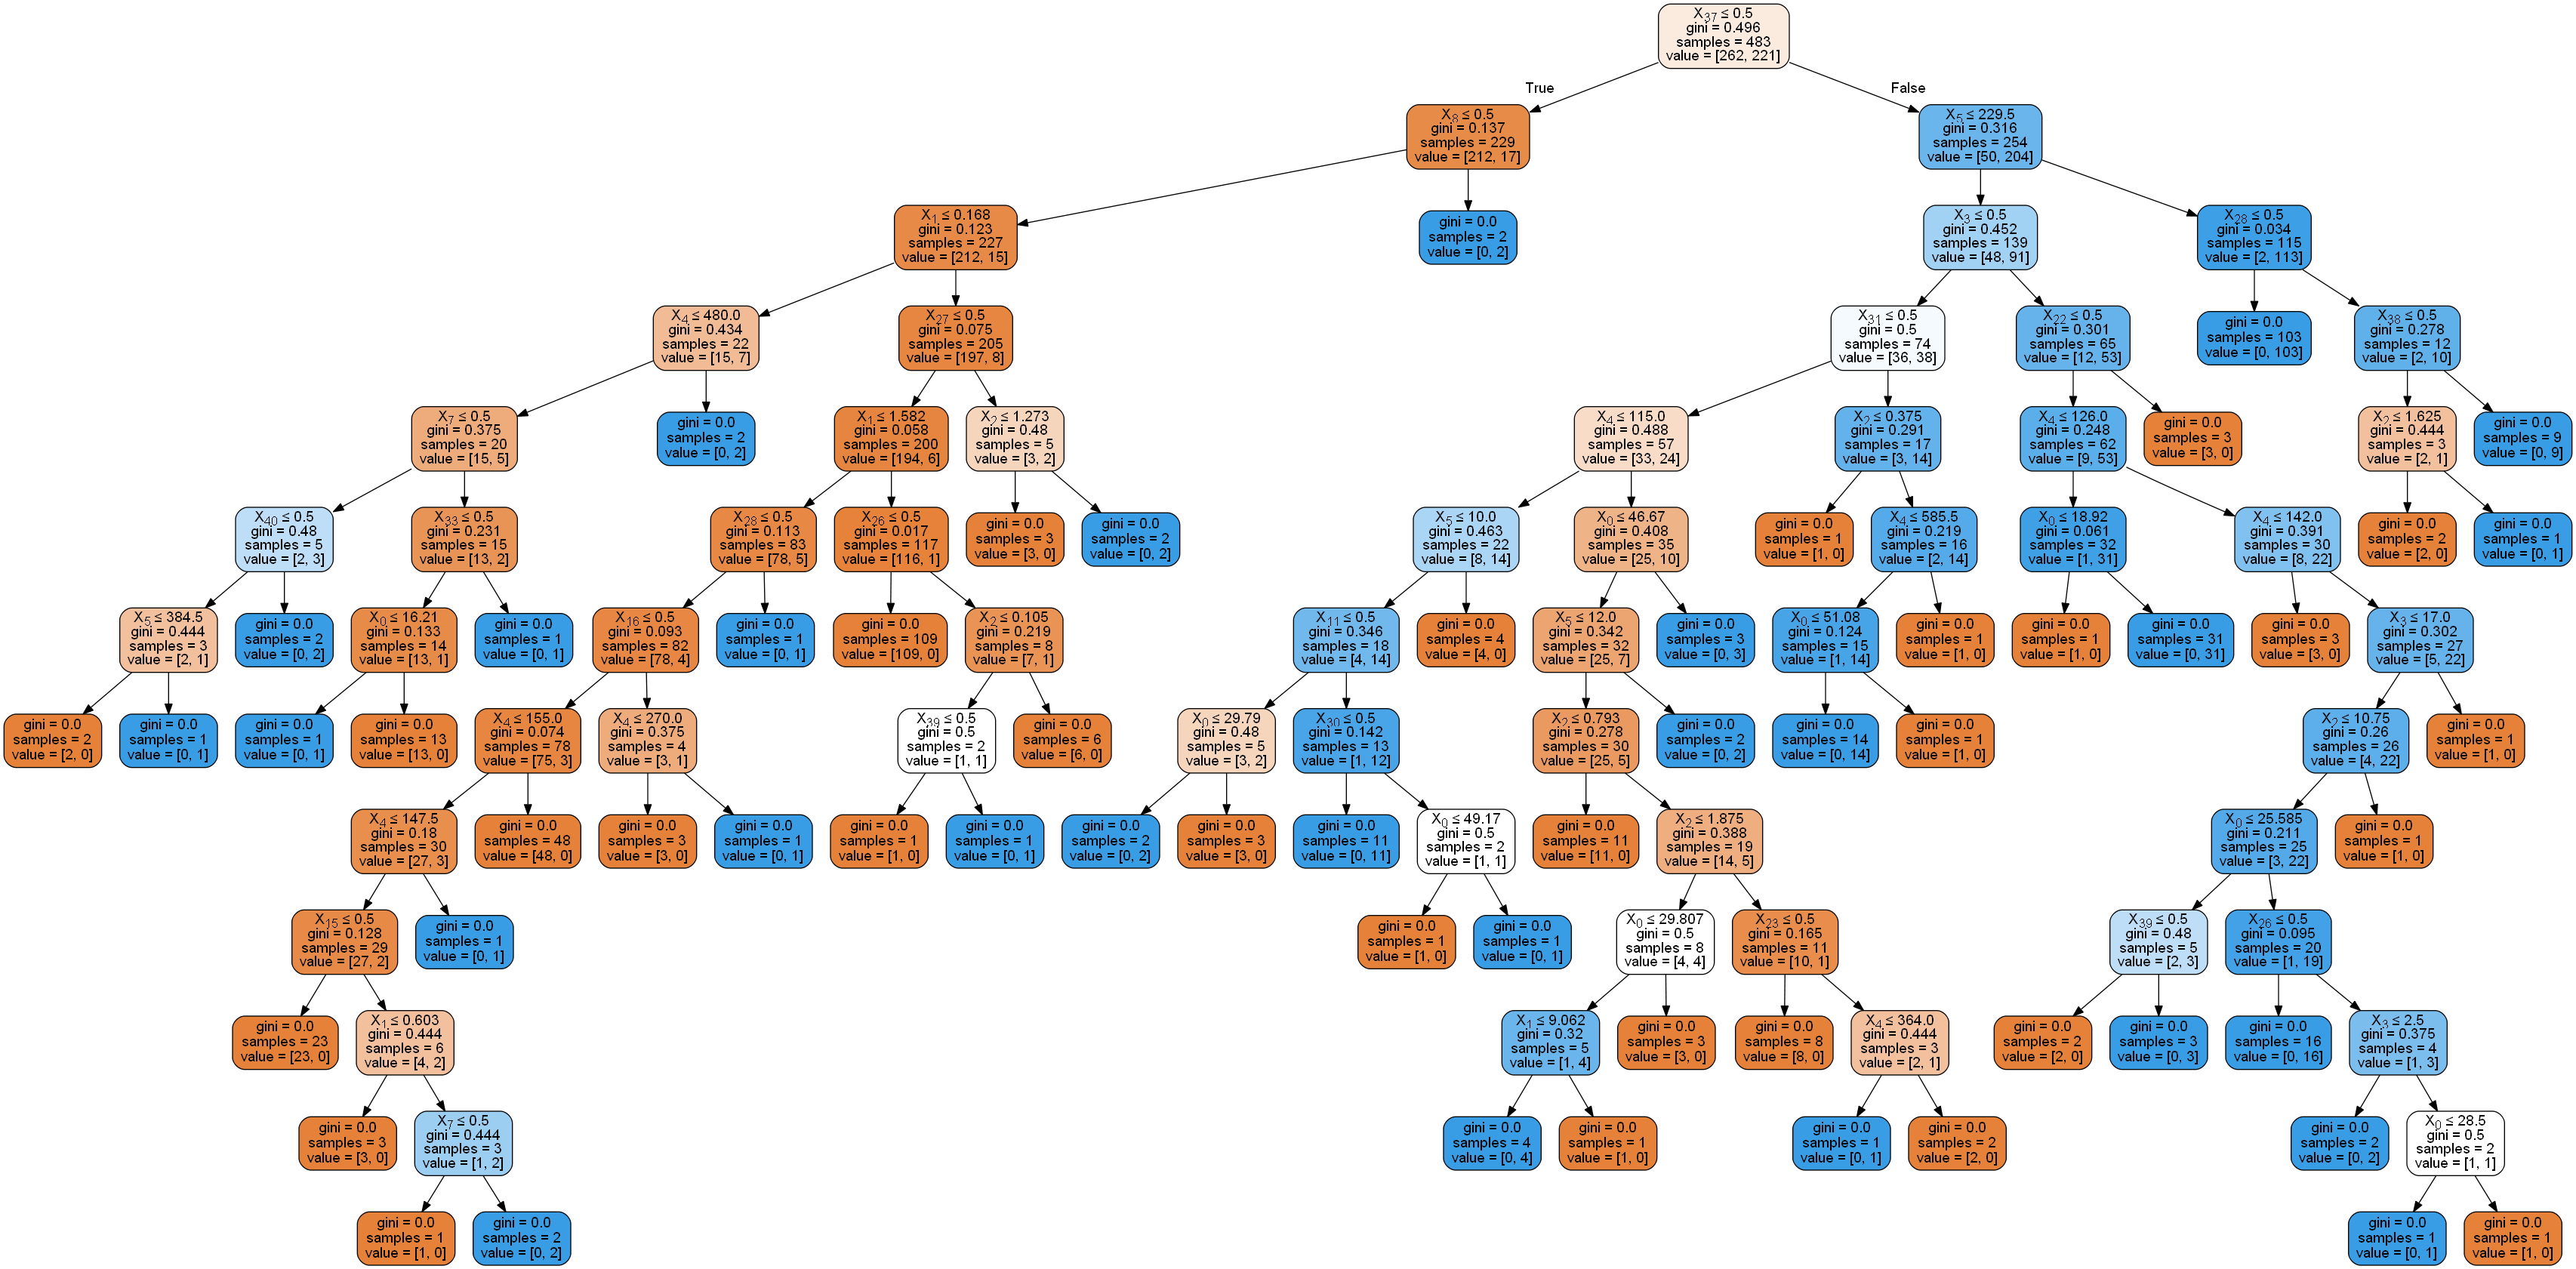

In [245]:
# PLot Decision Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Decision Tree Model - RandomizedSearchCV

In [246]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

dt1 = tree.DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
                 'max_leaf_nodes': np.arange(5,30,1),
                 'min_samples_split': np.arange(0.001,0.1,0.001),
                 'max_depth': np.arange(5,50,1),
                 'min_weight_fraction_leaf': np.arange(0.01,0.25,0.005)}

# Randomized Search Cross Validation returns an Object with best model parameters
rsearch = RandomizedSearchCV(estimator = dt1, param_distributions = param_grid, n_iter = 1000)

In [247]:
rsearch.fit(x_train_dummy, y_train)
print(rsearch.best_score_)
print(rsearch.best_estimator_)

0.865424430641822
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=21,
            max_features=None, max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.091,
            min_weight_fraction_leaf=0.039999999999999994, presort=False,
            random_state=None, splitter='best')


In [248]:
# Accuracy on Train data
print('Train Accuracy', rsearch.best_score_)

Train Accuracy 0.865424430641822


In [249]:
# Accuracy on Test data
print('Test Accuracy', rsearch.score(x_test_dummy, y_test))

Test Accuracy 0.8454106280193237


In [250]:
# Confusion Matrix
print('Train - Confusion Matrix')
print(confusion_matrix(y_train, rsearch.predict(x_train_dummy)))
print('-------------------------------------')
print('Train - Confusion Matrix')
print(confusion_matrix(y_test, rsearch.predict(x_test_dummy)))

Train - Confusion Matrix
[[233  29]
 [ 27 194]]
-------------------------------------
Train - Confusion Matrix
[[102  19]
 [ 13  73]]


## kNN Model - Default

In [91]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_jobs=-1)
neigh.fit(x_train_dummy_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [92]:
# Accuracy of the Train data

neigh.score(x_train_dummy_std, y_train)

0.8592132505175983

In [93]:
# Accuracy of the Vaildation data

neigh.score(x_test_dummy_std, y_test)

0.8067632850241546

## kNN Model - with RandomizedSearchCV

In [151]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_jobs=-1)

param_grid = {'n_neighbors' : np.arange(1, 15, 1),
              'leaf_size' : np.arange(1, 40, 1),
              'p' : [1,2],
              'weights' : ['uniform', 'distance'], 
             }

grid = RandomizedSearchCV(neigh, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

grid.fit(x_train_dummy_std, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]), 'p': [1, 2], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [152]:
grid.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 14, 'leaf_size': 36}

In [153]:
# Accuracy of the Train data
grid.score(x_train_dummy_std, y_train)

1.0

In [154]:
# Accuracy of the Vaildation data
grid.score(x_test_dummy_std, y_test)

0.821256038647343

In [156]:
# Confusion Matrix
print('Train - Confusion Matrix')
print(confusion_matrix(y_train, grid.predict(x_train_dummy_std)))
print('-------------------------------------')
print('Train - Confusion Matrix')
print(confusion_matrix(y_test, grid.predict(x_test_dummy_std)))


Train - Confusion Matrix
[[262   0]
 [  0 221]]
-------------------------------------
Train - Confusion Matrix
[[112   9]
 [ 28  58]]


## Random Forest Model - Default

In [251]:
# Check the dimesions of Train and Test attributes
print(x_train_dummy.shape)
print(y_train.shape)

print('------------')

print(x_test_dummy.shape)
print(y_test.shape)

(483, 42)
(483,)
------------
(207, 42)
(207,)


In [252]:
#Random Forest - With default values and n_estimators=20 (random)
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train_dummy, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [253]:
# Train Score
rf.score(x_train_dummy, y_train)

1.0

In [254]:
# Test Score
rf.score(x_test_dummy, y_test)

0.855072463768116

In [255]:
# Confusion Matrix
print('Train - Confusion Matrix')
print(confusion_matrix(y_train, rf.predict(x_train_dummy)))
print('-------------------------------------')
print('Train - Confusion Matrix')
print(confusion_matrix(y_test, rf.predict(x_test_dummy)))

Train - Confusion Matrix
[[262   0]
 [  0 221]]
-------------------------------------
Train - Confusion Matrix
[[109  12]
 [ 18  68]]


## Bagging Model - Default

In [256]:
# Bagging
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=20)
bg.fit(x_train_dummy, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [257]:
# Train Score
bg.score(x_train_dummy, y_train)

0.9523809523809523

In [258]:
# Test Score
bg.score(x_test_dummy, y_test)

0.8454106280193237

In [259]:
# Confusion Matrix
print('Train - Confusion Matrix')
print(confusion_matrix(y_train, bg.predict(x_train_dummy)))
print('-------------------------------------')
print('Train - Confusion Matrix')
print(confusion_matrix(y_test, bg.predict(x_test_dummy)))

Train - Confusion Matrix
[[256   6]
 [ 17 204]]
-------------------------------------
Train - Confusion Matrix
[[103  18]
 [ 14  72]]


## Boosting - Ada Boost Model - Default

In [260]:
#Boosting - Ada Boost (Default parameters)
adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1, algorithm='SAMME', 
                         random_state=12345)
adb.fit(x_train_dummy, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=50, random_state=12345)

In [261]:
# Train Score
adb.score(x_train_dummy, y_train)

0.9006211180124224

In [262]:
# Test Score
adb.score(x_test_dummy, y_test)
#            OR
# accuracy_score(y_test, adb.predict(x_test_dummy))

0.8405797101449275

In [263]:
# Confusion Matrix
print('Train - Confusion Matrix')
print(confusion_matrix(y_train, adb.predict(x_train_dummy)))
print('-------------------------------------')
print('Train - Confusion Matrix')
print(confusion_matrix(y_test, adb.predict(x_test_dummy)))

Train - Confusion Matrix
[[238  24]
 [ 24 197]]
-------------------------------------
Train - Confusion Matrix
[[103  18]
 [ 15  71]]


## Voting Classifier - Multiple Model Ensemble Model - Default

In [264]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel='poly', degree=2)

In [265]:
evc = VotingClassifier(estimators = [('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')

In [266]:
evc.fit(x_train_dummy.iloc[1:25], y_train.iloc[1:25])

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('dt', Decisio...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [267]:
# Accuracy on Train
evc.score(x_train_dummy, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7971014492753623

In [268]:
# Accuracy on Test
evc.score(x_test_dummy, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7729468599033816

In [269]:
# Confusion Matrix
print('Train - Confusion Matrix')
print(confusion_matrix(y_train, evc.predict(x_train_dummy)))
print('-------------------------------------')
print('Train - Confusion Matrix')
print(confusion_matrix(y_test, evc.predict(x_test_dummy)))

Train - Confusion Matrix
[[203  59]
 [ 39 182]]
-------------------------------------
Train - Confusion Matrix
[[94 27]
 [20 66]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## GBM Model - Default

In [271]:
from sklearn.ensemble import GradientBoostingClassifier

# GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', 
# min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
# min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, 
# warm_start=False, presort='auto')

gbc = GradientBoostingClassifier(
        learning_rate=0.01,
        max_depth = 1,
        n_estimators = 100,
        warm_start=True,
        random_state=12345
)

gbc.fit(x_train_dummy, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=12345, subsample=1.0, verbose=0,
              warm_start=True)

In [272]:
# Train Score
gbc.score(x_train_dummy, y_train)

0.8612836438923396

In [273]:
# Test Score
gbc.score(x_test_dummy, y_test)

0.8405797101449275

In [274]:
# Confusion Matrix
print('Train - Confusion Matrix')
print(confusion_matrix(y_train, gbc.predict(x_train_dummy)))
print('-------------------------------------')
print('Train - Confusion Matrix')
print(confusion_matrix(y_test, gbc.predict(x_test_dummy)))

Train - Confusion Matrix
[[212  50]
 [ 17 204]]
-------------------------------------
Train - Confusion Matrix
[[94 27]
 [ 6 80]]


## XGBoost Model - Default

In [187]:
# fit model no training data

model = XGBClassifier()
model.fit(x_train_dummy, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [191]:
# make predictions for Train data
y_train_pred = model.predict(x_train_dummy)
predictions_train = [round(value) for value in y_train_pred]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [193]:
# evaluate predictions
accuracy_train = accuracy_score(y_train, predictions_train)
print("Accuracy: %.2f%%" % (accuracy_train * 100.0))

Accuracy: 92.34%


In [195]:
# make predictions for test data
y_test_pred = model.predict(x_test_dummy)
predictions_test = [round(value) for value in y_test_pred]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [196]:
# evaluate predictions
accuracy_test = accuracy_score(y_test, predictions_test)
print("Accuracy: %.2f%%" % (accuracy_test * 100.0))

Accuracy: 74.88%


## XGBoost Model - with RandomizedSearchCV

In [167]:
#x_train_dummy.to_csv('x_train_with_dup_colms.csv', index=False)

In [180]:
# Column contains duplicate attributes - ff and t
# drop the duplicate columns
print(x_train_dummy.columns)
print(x_train_dummy.shape)
print('-------------------------------------')
x_train_dummy = x_train_dummy.drop(['ff', 't', 'p','j', 'gg', 'aa', 'cc', 'bb', 'dd'], axis=1)
print(x_train_dummy.shape)
print(x_train_dummy.columns)

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'a', 'b', 'l', 'u', 'y', 'g',
       'c', 'd', 'e', 'i', 'k', 'm', 'q', 'r', 'w', 'x', 'h', 'n', 'o', 'v',
       'z', 's'],
      dtype='object')
(483, 28)
-------------------------------------


KeyError: "labels ['ff' 't' 'p' 'j' 'gg' 'aa' 'cc' 'bb' 'dd'] not contained in axis"

In [181]:
x_train_dummy = x_train_dummy.loc[:, ~x_train_dummy.columns.duplicated()]
x_train_dummy.head()

,A2,A3,A8,A11,A14,A15,a,b,l,u,...,q,r,w,x,h,n,o,v,z,s
0,24.58,12.500,0.875,0.0,260.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18.25,0.165,0.250,0.0,280.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,41.17,1.335,0.165,0.0,168.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,21.83,0.250,0.665,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,33.17,1.040,6.500,0.0,164.0,31285.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [182]:
# Column contains duplicate attributes - ff and t
# drop the duplicate columns
print(x_test_dummy.columns)
print(x_test_dummy.shape)
print('-------------------------------------')
x_test_dummy = x_test_dummy.drop(['ff', 't', 'p','j', 'gg', 'aa', 'cc', 'bb', 'dd'], axis=1)
print(x_test_dummy.shape)
print(x_test_dummy.columns)

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'a', 'b', 'l', 'u', 'y', 'g',
       'c', 'd', 'e', 'i', 'k', 'm', 'q', 'r', 'w', 'x', 'h', 'n', 'o', 'v',
       'z', 's'],
      dtype='object')
(207, 28)
-------------------------------------


KeyError: "labels ['ff' 't' 'p' 'j' 'gg' 'aa' 'cc' 'bb' 'dd'] not contained in axis"

In [183]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
        
gbc1 = xgb.XGBClassifier()

param_grid = {'loss' : ['deviance', 'exponential'],
             'learning_rate' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
             'n_estimators' : [200],
             'max_depth' : np.arange(1, 20, 3),
             'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
             'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
             'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
             'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
             'gamma': [0, 0.25, 0.5, 1.0],
             'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
             }

In [184]:
fit_params = {'eval_metric': 'mlogloss', 
              'early_stopping_rounds': 50,
              'eval_set' : [(x_test_dummy, y_test)]
             }

In [185]:
rs_gbc = RandomizedSearchCV(gbc1, param_distributions=param_grid, n_iter=20, n_jobs=1, verbose=2, cv=10, 
                                fit_params=fit_params, random_state = 12345)

In [186]:
rs_gbc.fit(x_train_dummy, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:584: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] subsample=0.5, reg_lambda=10.0, n_estimators=200, min_child_weight=0.5, max_depth=4, loss=exponential, learning_rate=0.1, gamma=1.0, colsample_bytree=0.7, colsample_bylevel=1.0 


XGBoostError: b'[03:07:47] C:\\Users\\Administrator\\Desktop\\xgboost\\src\\metric\\multiclass_metric.cc:53: Check failed: label_error >= 0 && label_error < static_cast<int>(nclass) MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label'

In [ ]:
rs_gbc.best_score_

In [120]:
rs_gbc.predict(x_test_dummy)

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

In [123]:
rs_gbc.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

## <Center>Accuracy Table

In [93]:
accuracy_table = {'Logistic_Train' : accuracy_score(y_train, y_train_prediction), 
                  'Logistic_Test' : accuracy_score(y_test, y_test_prediction),
                  'Decision_Tree_Train' : dt.score(x_train_dummy, y_train),
                  'Decision_Tree_Test' : dt.score(x_test_dummy, y_test),  
                  'Decision_Tree_RandomSearch_Train' : rsearch.best_score_, 
                  'Decision_Tree_RandomSearch_Test' : rsearch.score(x_test_dummy, y_test), 
                  'Random_Forest_Train' : rf.score(x_train_dummy, y_train),
                  'Random_Forest_Test' : rf.score(x_test_dummy, y_test),
                  'Bagging_Train' : bg.score(x_train_dummy, y_train),
                  'Bagging_Test' : bg.score(x_test_dummy, y_test),
                  'AdaBoosting_Train' : adb.score(x_train_dummy, y_train),
                  'AdaBoosting_Test' : adb.score(x_test_dummy, y_test),
                  'Voting_Classifier_Train' : evc.score(x_train_dummy, y_train),
                  'Voting_Classifier_Test' : evc.score(x_test_dummy, y_test)
                 }

accuracy_table

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

## <center>END